# Mushroom Classification with Logistic Regression, SVC, DTC, RFC

Importing the modules

In [520]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [521]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mushrooms.csv')

### Exploring the data
`data.head()` gives a quick look at at the first 5 rows of the dataset
`data.info()` gives information on the number of values in each column, whether there is any null values, and the datatype of the column

In [522]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [523]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Data Preprocessing

### Dropping unneeded columns.
`bruises` and `population` have no effect on whether or not a specific mushroom is poisonous

In [524]:
data = data.drop(['bruises', 'population'], axis=1)


## Using class column as the independent variable.
### We will be training the model on the ability to predict whether or not a mushroom is poisonous based on its physical features
`Class` has 2 values - e for edible or p for poisonous

In [525]:
x=data.drop('class', axis=1)
y=data[['class']]

## Encoding Categorical Data
We will be using sklearn's OrdinalEncoder to convert the dataset's ordinal data into data that the model can use. This means that each column will be converted into integer values.

In [526]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder(dtype = 'int64')

In [527]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'habitat'],
      dtype='object')

In [528]:
x['cap-shape']=encoder.fit_transform(x[['cap-shape']])

In [529]:
x['cap-surface']=encoder.fit_transform(x[['cap-surface']])

In [530]:
x['cap-color']=encoder.fit_transform(x[['cap-color']])

In [531]:
x['odor']=encoder.fit_transform(x[['odor']])

In [532]:
x['gill-attachment']=encoder.fit_transform(x[['gill-attachment']])

In [533]:
x['gill-spacing']=encoder.fit_transform(x[['gill-spacing']])

In [534]:
x['gill-size']=encoder.fit_transform(x[['gill-size']])

In [535]:
x['gill-color']=encoder.fit_transform(x[['gill-color']])

In [536]:
x['stalk-shape']=encoder.fit_transform(x[['stalk-shape']])

In [537]:
x['stalk-root']=encoder.fit_transform(x[['stalk-root']])

In [538]:
x['stalk-surface-above-ring']=encoder.fit_transform(x[['stalk-surface-above-ring']])

In [539]:
x['stalk-surface-below-ring']=encoder.fit_transform(x[['stalk-surface-below-ring']])

In [540]:
x['stalk-color-above-ring']=encoder.fit_transform(x[['stalk-color-above-ring']])

In [541]:
x['stalk-color-below-ring']=encoder.fit_transform(x[['stalk-color-below-ring']])

In [542]:
x['veil-type']=encoder.fit_transform(x[['veil-type']])

In [543]:
x['veil-color']=encoder.fit_transform(x[['veil-color']])

In [544]:
x['ring-number']=encoder.fit_transform(x[['ring-number']])

In [545]:
x['ring-type']=encoder.fit_transform(x[['ring-type']])

In [546]:
x['spore-print-color']=encoder.fit_transform(x[['spore-print-color']])

In [547]:
x['habitat']=encoder.fit_transform(x[['habitat']])

In [548]:
x.head()

,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,habitat
0,5,2,4,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,5
1,5,2,9,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,1
2,0,2,8,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,3
3,5,3,8,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,5
4,5,2,3,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,1


In [549]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [550]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8124 non-null   int64
 1   cap-surface               8124 non-null   int64
 2   cap-color                 8124 non-null   int64
 3   odor                      8124 non-null   int64
 4   gill-attachment           8124 non-null   int64
 5   gill-spacing              8124 non-null   int64
 6   gill-size                 8124 non-null   int64
 7   gill-color                8124 non-null   int64
 8   stalk-shape               8124 non-null   int64
 9   stalk-root                8124 non-null   int64
 10  stalk-surface-above-ring  8124 non-null   int64
 11  stalk-surface-below-ring  8124 non-null   int64
 12  stalk-color-above-ring    8124 non-null   int64
 13  stalk-color-below-ring    8124 non-null   int64
 14  veil-type                 8124 non-null 

## Train Test Split

In [551]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

## Scaling the data using StandardScaler

In [552]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

## Voting Classifier with Logistic Regression, Random Forest Classifier, SVC, and Decision Tree Classifier

### `RandomForestClassifier()` - ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

### `LogisticRegression()` - supervised learning method that is used to calculate or predict the probability of a binary (yes/no) event occurring

### `SVC()` - supervised learning method that finds a hyperplane in a N-dimensional space (N is the number of features) that distinctly classifies the data points

### `DecisionTreeClassifier()` - a supervised learning method that implement a sequential decision process to evaluate features

In [553]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [554]:
#log_clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
#rnd_clf = RandomForestClassifier(criterion='gini', n_estimators=1000)
#svm_clf = SVC(gamma='auto', kernel='linear')
#dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [555]:
#log_clf = LogisticRegression(solver='liblinear', multi_class='auto', max_iter=10000)
#rnd_clf = RandomForestClassifier(criterion='entropy', n_estimators=1000)
#svm_clf = SVC(gamma='auto', kernel='poly')
#dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [556]:
#log_clf = LogisticRegression(solver='saga', multi_class='auto', max_iter=10000)
#rnd_clf = RandomForestClassifier(criterion='gini', n_estimators=10000)
#svm_clf = SVC(gamma='auto', kernel='rbf')
#dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)

In [557]:
log_clf = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000)
rnd_clf = RandomForestClassifier(criterion='entropy', n_estimators=10000)
svm_clf = SVC(gamma='auto', kernel='sigmoid')
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [558]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf),
                                          ('rf', rnd_clf),
                                          ('svc', svm_clf),
                                          ('dt', dt_clf)],
                              voting = 'hard' #voting='soft' to change
                              )

In [559]:
voting_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000, solver='sag')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10000)),
                             ('svc', SVC(gamma='auto', kernel='sigmoid')),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     random_state=0))])

In [560]:
from sklearn.metrics import accuracy_score
from numpy.core.arrayprint import format_float_scientific
for clf in (log_clf, rnd_clf, svm_clf, dt_clf, voting_clf):
  clf.fit(x_train, y_train)
  y_pred=clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


LogisticRegression 0.9464615384615385
RandomForestClassifier 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.8153846153846154
DecisionTreeClassifier 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier 0.9772307692307692


## Analyzing the Model

I have selected RandomForestClassifier as it gives the highest score

In [561]:
rnd_clf = RandomForestClassifier(criterion='entropy', n_estimators=1000)
rnd_clf.fit(x_train, y_train)
y_pred=rnd_clf.predict(x_test)
rnd_clf.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1.0

In [562]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [563]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[843   0]
 [  0 782]]


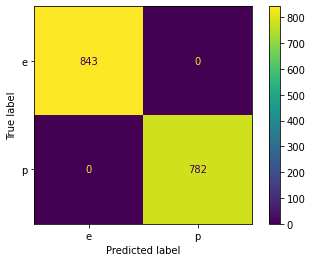

In [564]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rnd_clf.classes_)
disp.plot()
plt.show()

## True Negative(TN) = bottom right - mushrooms were correctly identified as poisonous
## True Positive(TP) = top left - mushrooms were correctly identified as edible
## False Positive(FP) = top right - mushrooms were predicted as poisounous but are actually edible
## False Negative(FN) = bottom left - mushrooms were predicted as edible but are actually poisonous

# 1. Precision: Percentage of correct positive predictions relative to total positive predictions

# 2. Recall: Percentage of correct positive predictions relative to total actual positives

# 3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model

## F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

In [565]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [566]:
from prettytable import PrettyTable

In [567]:
myTable=PrettyTable(["Model", "Prediction"])

In [568]:
myTable.add_row(["Logistic Regression", log_clf.score(x_test, y_test)])
myTable.add_row(["Random Forest", rnd_clf.score(x_test, y_test)])
myTable.add_row(["Decision Tree", dt_clf.score(x_test, y_test)])
myTable.add_row(["SVC", svm_clf.score(x_test, y_test)])
myTable.add_row(["Voting Classifier", voting_clf.score(x_test, y_test)])

In [569]:
print(myTable)

+---------------------+--------------------+
|        Model        |     Prediction     |
+---------------------+--------------------+
| Logistic Regression | 0.9464615384615385 |
|    Random Forest    |        1.0         |
|    Decision Tree    |        1.0         |
|         SVC         | 0.8153846153846154 |
|  Voting Classifier  | 0.9772307692307692 |
+---------------------+--------------------+
